<a href="https://colab.research.google.com/github/soufianegouait/Mentorness/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install prophet

Step 1: Data Preprocessing
Convert date to a proper datetime format.
Handle missing values if any.
Encode categorical variables. \

Step 2: Exploratory Data Analysis (EDA)
Analyze the time series for trends, seasonality, and anomalies.
Plot the data to visualize patterns.

       market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012  


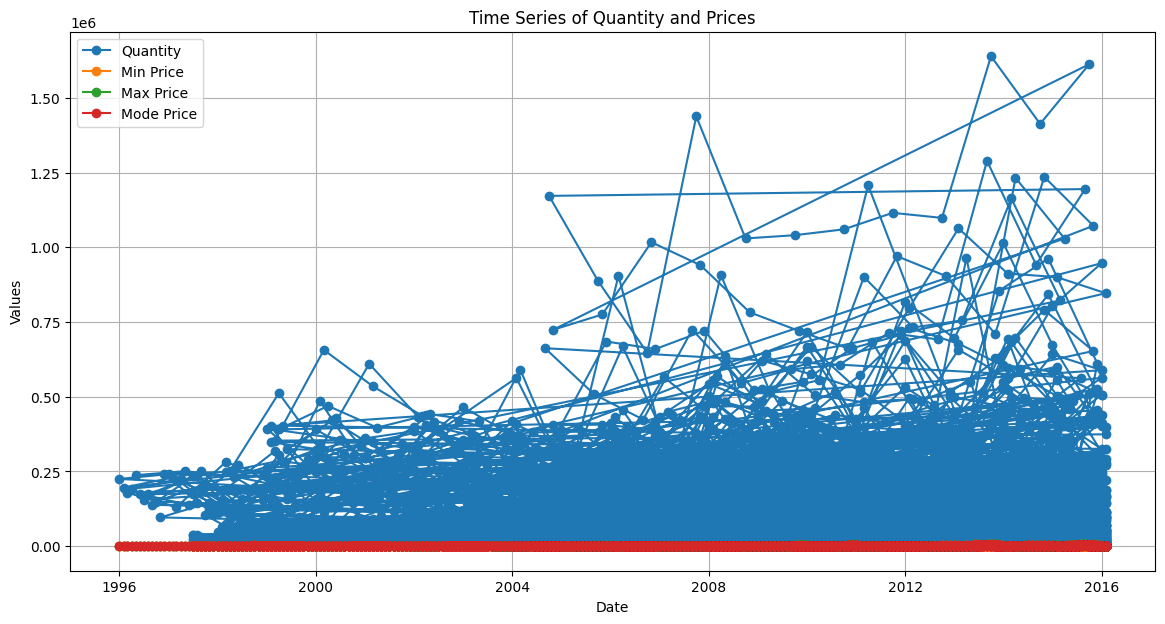

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load the dataset from the CSV file
data = pd.read_csv('MarketPricePrediction.csv')


# Display the first few rows of the dataset
print(data.head())


# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')

# Fill missing values if necessary
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['market'] = label_encoder.fit_transform(data['market'])
data['state'] = label_encoder.fit_transform(data['state'])
data['city'] = label_encoder.fit_transform(data['city'])

# EDA
# Plot time series for quantity and prices
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['quantity'], label='Quantity', marker='o')
plt.plot(data['date'], data['priceMin'], label='Min Price', marker='o')
plt.plot(data['date'], data['priceMax'], label='Max Price', marker='o')
plt.plot(data['date'], data['priceMod'], label='Mode Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of Quantity and Prices')
plt.legend()
plt.grid(True)
plt.show()




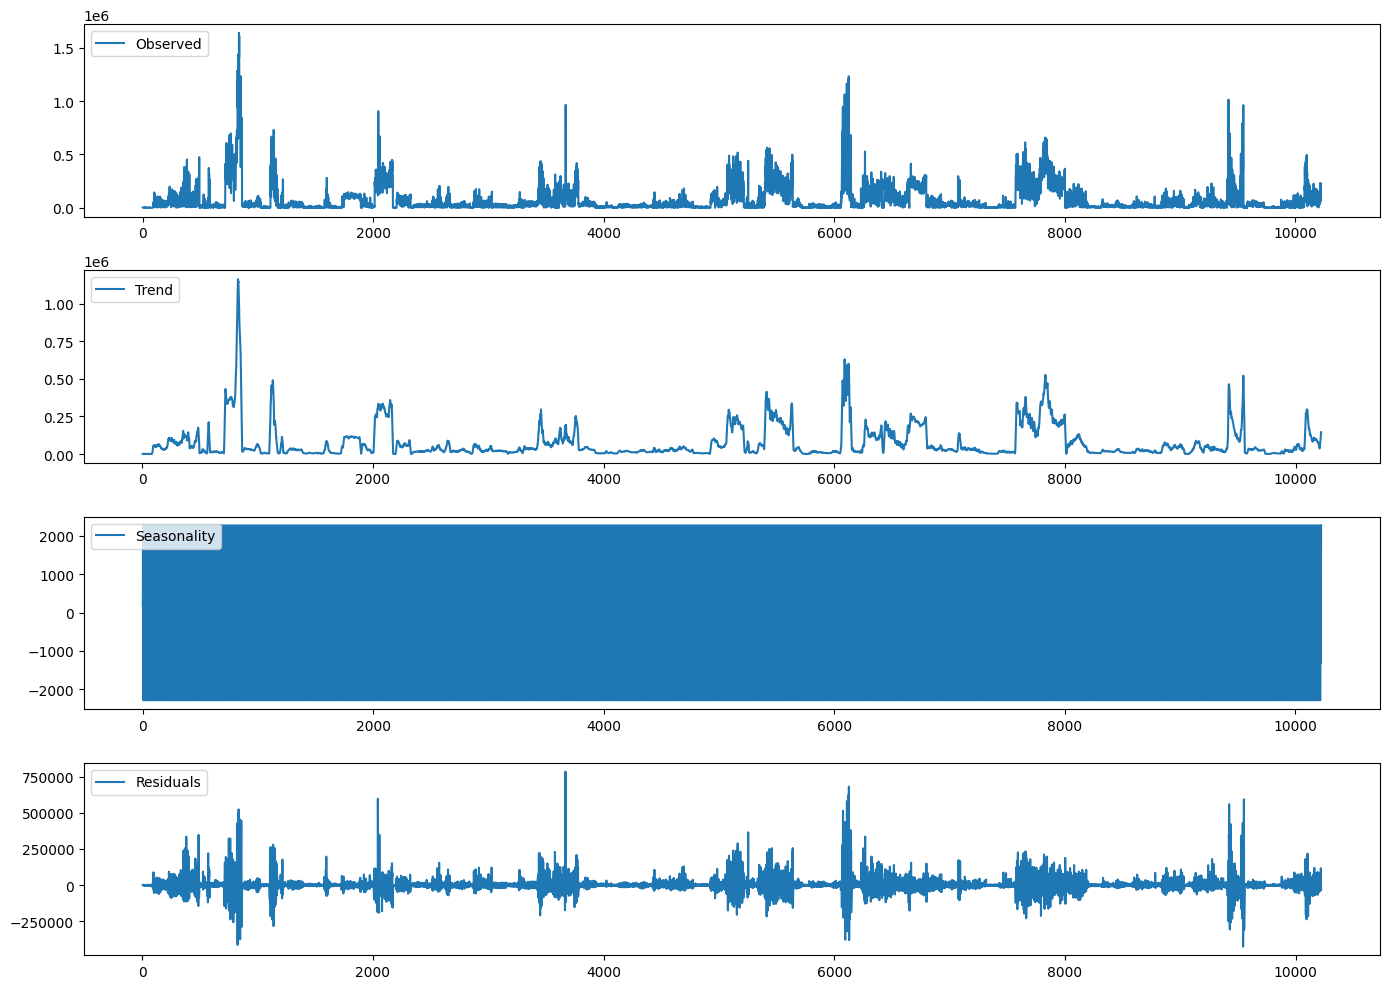

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Decompose the time series
decomposition = seasonal_decompose(data['quantity'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Analyze Autocorrelation and Partial Autocorrelation



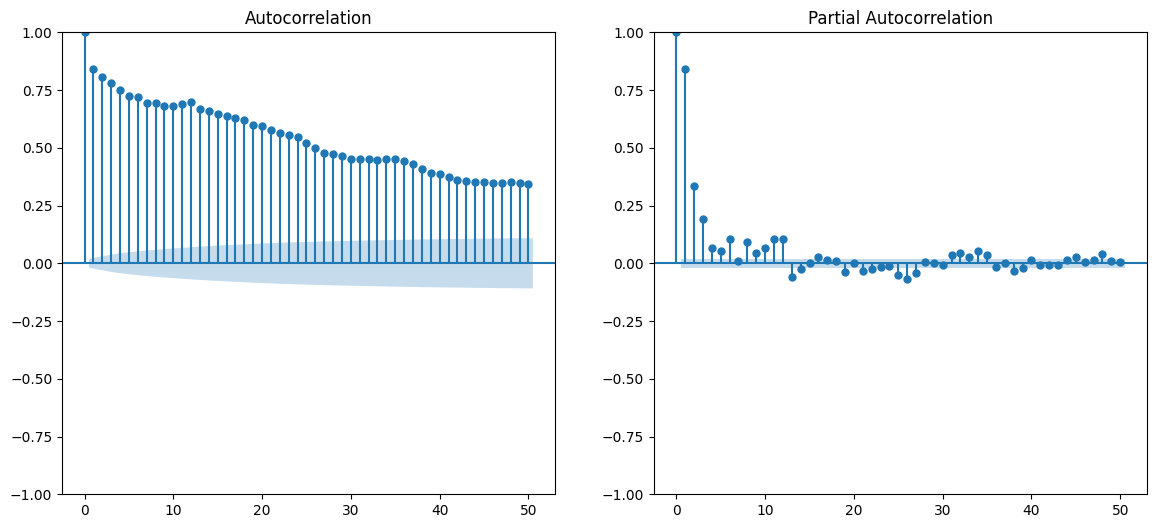

In [19]:
# Plot ACF and PACF for the time series
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(data['quantity'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(data['quantity'], lags=50, ax=plt.gca())
plt.show()

Compute Summary Statistics

In [20]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

             market          year      quantity      priceMin      priceMax  \
count  10227.000000  10227.000000  1.022700e+04  10227.000000  10227.000000   
mean      61.705779   2009.022294  7.660488e+04    646.944363   1212.760731   
min        0.000000   1996.000000  2.000000e+01     16.000000    145.000000   
25%       36.000000   2006.000000  8.898000e+03    209.000000    557.000000   
50%       64.000000   2009.000000  2.746000e+04    440.000000    923.000000   
75%       90.000000   2013.000000  8.835650e+04    828.000000   1527.000000   
max      119.000000   2016.000000  1.639032e+06   6000.000000   8192.000000   
std       33.552213      4.372841  1.244087e+05    673.121850    979.658874   

           priceMod         state          city                           date  
count  10227.000000  10227.000000  10227.000000                          10227  
mean     984.284345     12.537499     59.570157  2009-06-22 18:57:58.556761344  
min       80.000000      0.000000      0.0000

Feature Engineering:

Create lagged features and rolling statistics.
Add seasonal indicators and other relevant features.
Model Selection and Training:

Implement and compare models like ARIMA, SARIMA, Prophet, and LSTM.

In [21]:
# Create lagged features
data['quantity_lag1'] = data['quantity'].shift(1)
data['priceMin_lag1'] = data['priceMin'].shift(1)
data['priceMax_lag1'] = data['priceMax'].shift(1)
data['priceMod_lag1'] = data['priceMod'].shift(1)

# Create rolling statistics
data['quantity_roll_mean_3'] = data['quantity'].rolling(window=3).mean()
data['priceMin_roll_mean_3'] = data['priceMin'].rolling(window=3).mean()
data['priceMax_roll_mean_3'] = data['priceMax'].rolling(window=3).mean()
data['priceMod_roll_mean_3'] = data['priceMod'].rolling(window=3).mean()

data['quantity_roll_std_3'] = data['quantity'].rolling(window=3).std()
data['priceMin_roll_std_3'] = data['priceMin'].rolling(window=3).std()
data['priceMax_roll_std_3'] = data['priceMax'].rolling(window=3).std()
data['priceMod_roll_std_3'] = data['priceMod'].rolling(window=3).std()

# Create seasonal indicators
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


# Fill NA values generated by lagging and rolling statistics
data.fillna(method='bfill', inplace=True)

# Display the data to check the new features
print(data.head())


   market  month  year  quantity  priceMin  priceMax  priceMod  state  city  \
0       0      1  2005      2350       404       493       446     16     0   
1       0      1  2006       900       487       638       563     16     0   
2       0      1  2010       790      1283      1592      1460     16     0   
3       0      1  2011       245      3067      3750      3433     16     0   
4       0      1  2012      1035       523       686       605     16     0   

        date  ...  priceMax_lag1  priceMod_lag1  quantity_roll_mean_3  \
0 2005-01-01  ...          493.0          446.0           1346.666667   
1 2006-01-01  ...          493.0          446.0           1346.666667   
2 2010-01-01  ...          638.0          563.0           1346.666667   
3 2011-01-01  ...         1592.0         1460.0            645.000000   
4 2012-01-01  ...         3750.0         3433.0            690.000000   

   priceMin_roll_mean_3  priceMax_roll_mean_3  priceMod_roll_mean_3  \
0            72

Model Selection and Training:
Implement and compare various time series models (ARIMA, SARIMA, Prophet, LSTM).

Model Evaluation:
Assess the performance of the models using metrics such as MAE, MSE, and RMSE.

Fine-tuning and Validation:\
Fine-tune model parameters and validate performance on unseen data.

Load Necessary Libraries

In [22]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Suppress warnings
warnings.filterwarnings("ignore")

Prepare Data for Time Series Models :

In [23]:
# Define the target variable and features
target = 'quantity'
features = ['quantity_lag1', 'quantity_roll_mean_3', 'quantity_roll_std_3']

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

ARIMA Model

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(y_test))
arima_pred = arima_pred[:len(y_test)]

# Evaluate the model
arima_mae = mean_absolute_error(y_test, arima_pred)
arima_mse = mean_squared_error(y_test, arima_pred)
arima_rmse = sqrt(arima_mse)

SARIMA Model

In [25]:
# Fit the SARIMA model
sarima_model = SARIMAX(y_train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# Make predictions
sarima_pred = sarima_model_fit.forecast(steps=len(y_test))

# Evaluate the model
sarima_mae = mean_absolute_error(y_test, sarima_pred)
sarima_mse = mean_squared_error(y_test, sarima_pred)
sarima_rmse = sqrt(sarima_mse)

Prophet Model

In [26]:
# Prepare data for Prophet
from prophet import Prophet
prophet_data = data[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})

# Split into train and test
prophet_train = prophet_data[:train_size]
prophet_test = prophet_data[train_size:]

# Fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Make predictions
future = prophet_model.make_future_dataframe(periods=len(y_test), freq='M')
forecast = prophet_model.predict(future)
prophet_pred = forecast['yhat'][-len(y_test):].values

# Evaluate the model
prophet_mae = mean_absolute_error(y_test, prophet_pred)
prophet_mse = mean_squared_error(y_test, prophet_pred)
prophet_rmse = sqrt(prophet_mse)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2c5yua7d/mtacjf7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2c5yua7d/ghm798ix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61674', 'data', 'file=/tmp/tmp2c5yua7d/mtacjf7g.json', 'init=/tmp/tmp2c5yua7d/ghm798ix.json', 'output', 'file=/tmp/tmp2c5yua7d/prophet_modelwidp41xa/prophet_model-20240530115810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:58:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:58:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


LSTM Model

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['quantity']])

# Create the dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
lstm_X, lstm_y = create_dataset(scaled_data, look_back)

# Split into train and test
train_size = int(len(lstm_X) * 0.8)
lstm_X_train, lstm_X_test = lstm_X[:train_size], lstm_X[train_size:]
lstm_y_train, lstm_y_test = lstm_y[:train_size], lstm_y[train_size:]

# Reshape input to be [samples, time steps, features]
lstm_X_train = np.reshape(lstm_X_train, (lstm_X_train.shape[0], lstm_X_train.shape[1], 1))
lstm_X_test = np.reshape(lstm_X_test, (lstm_X_test.shape[0], lstm_X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(lstm_X_train, lstm_y_train, epochs=10, batch_size=1, verbose=2)

# Make predictions
lstm_pred = lstm_model.predict(lstm_X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)

# Ensure lstm_y_test is the correct shape for comparison
lstm_y_test = scaler.inverse_transform(lstm_y_test.reshape(-1, 1))

# Trim y_test to match lstm_pred length if needed
y_test = y_test[-len(lstm_pred):]

# Evaluate the model
lstm_mae = mean_absolute_error(lstm_y_test, lstm_pred)
lstm_mse = mean_squared_error(lstm_y_test, lstm_pred)
lstm_rmse = sqrt(lstm_mse)

print(f'LSTM MAE: {lstm_mae}')
print(f'LSTM MSE: {lstm_mse}')
print(f'LSTM RMSE: {lstm_rmse}')


Epoch 1/3
8179/8179 - 33s - loss: 0.0019 - 33s/epoch - 4ms/step
Epoch 2/3
8179/8179 - 30s - loss: 0.0018 - 30s/epoch - 4ms/step
Epoch 3/3
8179/8179 - 30s - loss: 0.0017 - 30s/epoch - 4ms/step
64/64 [==============================] - 1s 3ms/step
LSTM MAE: 28000.666405294927
LSTM MSE: 2977261411.367858
LSTM RMSE: 54564.28695921773


Compare Model Performance

In [28]:
# Print the performance metrics
print("ARIMA Model")
print(f"MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}\n")

print("SARIMA Model")
print(f"MAE: {sarima_mae}, MSE: {sarima_mse}, RMSE: {sarima_rmse}\n")

print("Prophet Model")
print(f"MAE: {prophet_mae}, MSE: {prophet_mse}, RMSE: {prophet_rmse}\n")

print("LSTM Model")
print(f"MAE: {lstm_mae}, MSE: {lstm_mse}, RMSE: {lstm_rmse}\n")

ARIMA Model
MAE: 46550.34785806395, MSE: 7250080759.128453, RMSE: 85147.40606224275

SARIMA Model
MAE: 57643.253660138755, MSE: 11016577133.462559, RMSE: 104959.88344821348

Prophet Model
MAE: 345751.6820210215, MSE: 177686151158.1188, RMSE: 421528.3515472225

LSTM Model
MAE: 28000.666405294927, MSE: 2977261411.367858, RMSE: 54564.28695921773



Visualize Predictions

ValueError: x and y must have same first dimension, but have shapes (2045,) and (2046,)

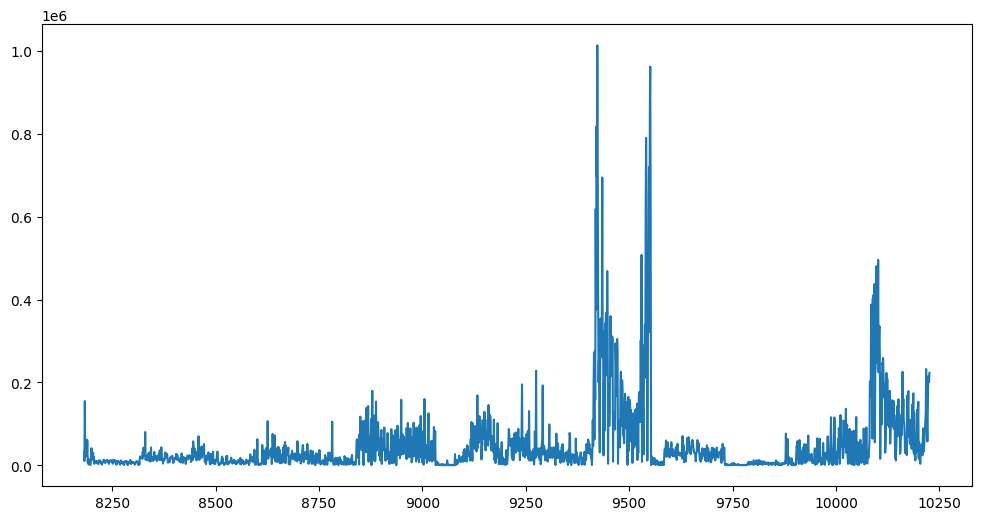

In [29]:
# Plot the results


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, arima_pred, label='ARIMA Predicted', color='red')
plt.plot(y_test.index, sarima_pred, label='SARIMA Predicted', color='green')
plt.plot(y_test.index, prophet_pred, label='Prophet Predicted', color='blue')
plt.plot(y_test.index, lstm_pred, label='LSTM Predicted', color='purple')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Models - Actual vs Predicted')
plt.legend()
plt.show()